# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [1]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,...,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,...,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,...,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,...,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,...,5,0,0,0,4,1,1,0,0,1


In [2]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

## Preprocessing Data

In [3]:
# examine data types for accident data
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [4]:
# replace numbers in 'day_of_week' column with text
days_of_week=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
accidents['day_of_week']=accidents['day_of_week'].replace(
                                    to_replace=[1,2,3,4,5,6,7],
                                    value=days_of_week
)

In [5]:
# convert 'time' and 'hour' columns to accidents data
accidents['time'] = pd.to_datetime(accidents['time'])
accidents['hour'] = pd.DatetimeIndex(accidents['time']).hour
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   accident_index                           91199 non-null  object        
 1   accident_year                            91199 non-null  int64         
 2   accident_reference                       91199 non-null  object        
 3   longitude                                91185 non-null  float64       
 4   latitude                                 91185 non-null  float64       
 5   accident_severity                        91199 non-null  int64         
 6   number_of_vehicles                       91199 non-null  int64         
 7   number_of_casualties                     91199 non-null  int64         
 8   date                                     91199 non-null  object        
 9   day_of_week                            

In [6]:
# look up keys for urban or rural areas
urban_rural=lookup[lookup['field name']=='urban_or_rural_area']
print(urban_rural)

        table           field name code/format                         label  \
125  Accident  urban_or_rural_area           1                         Urban   
126  Accident  urban_or_rural_area           2                         Rural   
127  Accident  urban_or_rural_area           3                   Unallocated   
128  Accident  urban_or_rural_area          -1  Data missing or out of range   

                         note  
125  field introduced in 1994  
126  field introduced in 1994  
127  field introduced in 1994  
128  field introduced in 1994  


In [7]:
# convert 'code/format' column of 'urban_rural' to integer
urban_rural['code/format'] = urban_rural['code/format'].astype('int')
urban_rural.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 125 to 128
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   table        4 non-null      object
 1   field name   4 non-null      object
 2   code/format  4 non-null      int64 
 3   label        4 non-null      object
 4   note         4 non-null      object
dtypes: int64(1), object(4)
memory usage: 192.0+ bytes


In [8]:
# replace codes in "urban_or_rural_area column of accidents to descriptive text
codes = list(urban_rural['code/format'])
urban_or_rural = list(urban_rural['label'])

accidents['urban_or_rural_area'] = accidents['urban_or_rural_area'].replace(
                                                                to_replace = codes,
                                                                value = urban_or_rural
                                                                )
accidents['urban_or_rural_area'].head()

0    Urban
1    Urban
2    Urban
3    Urban
4    Urban
Name: urban_or_rural_area, dtype: object

## Examining major accidents by days of week

In [9]:
# add column identifying if accident is major
accidents['major'] = (accidents['number_of_casualties']>=3)
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,hour,major
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,Tuesday,...,9,9,1,9,9,0,0,Urban,9,False
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,Monday,...,0,4,1,1,1,0,0,Urban,13,False
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,Wednesday,...,0,0,4,1,2,0,0,Urban,1,False
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,Wednesday,...,0,4,4,1,1,0,0,Urban,1,False
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,Wednesday,...,0,0,4,1,1,0,0,Urban,2,False


In [10]:
# filter data for major accidents
major_accidents = accidents[accidents['major']==True]
major_accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,hour,major
11,2020010228024,2020,10228024,-0.058620,51.660013,2,3,4,01/01/2020,Wednesday,...,0,5,4,1,2,0,0,Urban,3,True
136,2020010228521,2020,10228521,-0.086520,51.616219,3,1,4,03/01/2020,Friday,...,0,9,4,1,1,0,0,Urban,22,True
173,2020010228625,2020,10228625,-0.190729,51.459756,3,3,3,05/01/2020,Sunday,...,0,0,1,1,1,0,0,Urban,11,True
187,2020010228670,2020,10228670,0.185884,51.478366,3,2,3,05/01/2020,Sunday,...,0,0,1,1,1,0,0,Urban,14,True
212,2020010228789,2020,10228789,-0.251891,51.553577,2,2,4,06/01/2020,Monday,...,0,0,4,1,1,6,0,Urban,15,True


In [11]:
# count major accidents by day of week
major_accidents.groupby('day_of_week')['major'].sum()

day_of_week
Friday       798
Monday       614
Saturday     820
Sunday       687
Thursday     645
Tuesday      621
Wednesday    632
Name: major, dtype: int64

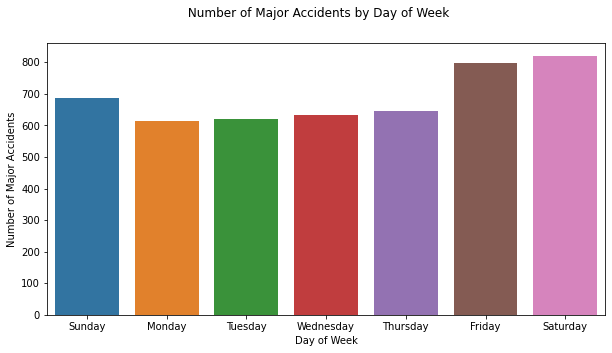

In [12]:
# import dependencies for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# plot major accidents by day of week
sns.countplot(x='day_of_week', data=major_accidents, order=days_of_week)
plt.gcf().set_size_inches(10,5)
plt.suptitle(' Number of Major Accidents by Day of Week')
plt.ylabel('Number of Major Accidents')
plt.xlabel('Day of Week')
plt.show()

Major accidents seem to happen most on Fridays and Saturdays. In our data, 798 major accidents happened on Fridays and 820 happened on Saturdays. Sundays seemed to also have more accidents than most weekdays with 687 major accidents in the data set.

There seems to be a pattern with accidents increasing gradually over week days. Mondays had 614 major accidents and this gradually increased to 645 major accidents on Thursdays. This then sharply increased to 798 major accidents, as pointed out above, on Fridays. 

## What time of day do major accidents happen the most?

In [13]:
# count major accidents by hour of day
major_accidents.groupby('hour')['hour'].count()

hour
0      94
1      73
2      54
3      48
4      33
5      41
6      65
7     110
8     197
9     149
10    211
11    242
12    272
13    312
14    372
15    401
16    433
17    374
18    341
19    286
20    232
21    159
22    181
23    137
Name: hour, dtype: int64

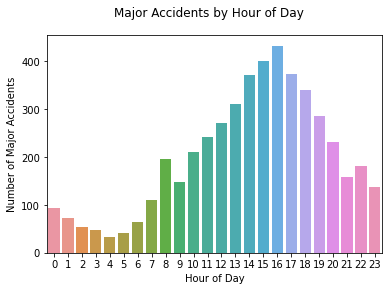

In [14]:
# plot major accidents by time of day
sns.countplot(x='hour', data=major_accidents)
plt.ylabel('Number of Major Accidents')
plt.xlabel('Hour of Day')
plt.suptitle('Major Accidents by Hour of Day')
plt.show()

Major accidents seemed to peak during the late afternoon/early evening hours. In this data set, the hour between 4PM and 5PM has the most major accidents at 433. In fact, the number of major accidents increases every hour--except for the hour between 8AM and 9AM--from the early morning hour between 4AM and 5AM at 33 major accidents until the peak between 4PM and 5PM. From 5PM there's a noticeable decrease every hour--except for the hour between 9PM and 10PM--until the low point between 4AM and 5AM.

## How about non-major accidents?
Is there a similar pattern for non-major accidents?

In [15]:
# Filter data for non-major accidents
non_major = accidents[accidents['major']==False]
non_major.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,hour,major
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,Tuesday,...,9,9,1,9,9,0,0,Urban,9,False
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,Monday,...,0,4,1,1,1,0,0,Urban,13,False
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,Wednesday,...,0,0,4,1,2,0,0,Urban,1,False
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,Wednesday,...,0,4,4,1,1,0,0,Urban,1,False
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,Wednesday,...,0,0,4,1,1,0,0,Urban,2,False


In [16]:
# count number of non-major accidents by day of week
non_major.groupby('day_of_week')['day_of_week'].count()

day_of_week
Friday       14091
Monday       12158
Saturday     11516
Sunday        9628
Thursday     13411
Tuesday      12646
Wednesday    12932
Name: day_of_week, dtype: int64

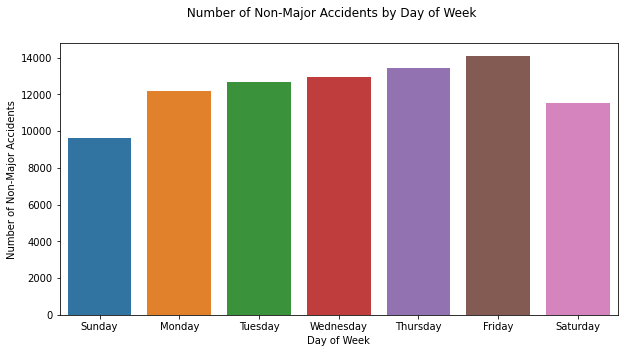

In [17]:
# create count plot of non-major accidents by day of week
sns.countplot(x='day_of_week', data=non_major, order=days_of_week)
plt.gcf().set_size_inches(10,5)
plt.suptitle(' Number of Non-Major Accidents by Day of Week')
plt.ylabel('Number of Non-Major Accidents')
plt.xlabel('Day of Week')
plt.show()

The number of non-major accidents shows a similar pattern to major accidents during weekdays in that there's an increase as the weekdays progress. There are 12,158 non-major accidents on Mondays and 14.091 on Fridays. However, unlike major accidents, non-major accidents were noticeably less common on Sundays and Saturdays with Sundays having 9,628 non-major accidents and Saturdays having 11,516.

In [18]:
# count number of non-major accidents by hour of day
non_major.groupby('hour')['hour'].count()

hour
0     1094
1      842
2      604
3      518
4      475
5      814
6     1765
7     3626
8     5070
9     3768
10    3962
11    4570
12    5123
13    5429
14    5873
15    6960
16    6948
17    7439
18    6277
19    4762
20    3483
21    2947
22    2374
23    1659
Name: hour, dtype: int64

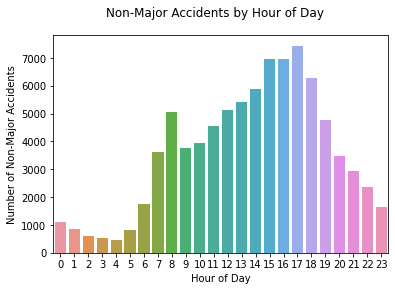

In [19]:
# plot major accidents by time of day
sns.countplot(x='hour', data=non_major)
plt.ylabel('Number of Non-Major Accidents')
plt.xlabel('Hour of Day')
plt.suptitle('Non-Major Accidents by Hour of Day')
plt.show()

The incidence of non-major accidents by time of day shows a similar pattern as major accidents. The hour between 4AM and 5AM had the fewest with 475 non-major accidents, then increasing from 5AM onwards, peaking at 7,439 accidents in the hour between 5PM and 6PM, then decreasing every hour until 4AM.

Because this pattern is similar for both non-major and major accidents, it could simply just be that accidents in general are most common during the late afternoon/early evening hours when most commuters might be driving home and least common in the very early morning hours when most people are still asleep.

## Do the number of cars matter?


In [20]:
# count the number of major accidents by the number of vehicles involved
accidents.groupby(['number_of_vehicles','major'])['number_of_vehicles'].count()

number_of_vehicles  major
1                   False    25154
                    True       576
2                   False    54437
                    True      2955
3                   False     5336
                    True       905
4                   False     1065
                    True       269
5                   False      268
                    True        63
6                   False       65
                    True        34
7                   False       45
                    True         2
8                   False        7
                    True         8
9                   False        1
                    True         2
10                  False        1
                    True         2
11                  False        1
                    True         1
12                  False        1
13                  False        1
Name: number_of_vehicles, dtype: int64

In [21]:
# calculate percentage of major accidents by number of vehicles involved
major_vehicles=major_accidents.groupby(['number_of_vehicles'])['number_of_vehicles'].count()/len(major_accidents)*100
print(round(major_vehicles,2))

number_of_vehicles
1     11.96
2     61.35
3     18.79
4      5.58
5      1.31
6      0.71
7      0.04
8      0.17
9      0.04
10     0.04
11     0.02
Name: number_of_vehicles, dtype: float64


In [22]:
# calculate percentage of non-major accidents by number of vehicles involved
non_major_vehicles=non_major.groupby(['number_of_vehicles'])['number_of_vehicles'].count()/len(non_major)*100
print(round(non_major_vehicles,2))

number_of_vehicles
1     29.12
2     63.02
3      6.18
4      1.23
5      0.31
6      0.08
7      0.05
8      0.01
9      0.00
10     0.00
11     0.00
12     0.00
13     0.00
Name: number_of_vehicles, dtype: float64


In [23]:
# Calculate percentage of major accidents that involved at least three vehicles
major_three_or_more = major_accidents[major_accidents['number_of_vehicles']>2]['accident_index'].count()
major_three_or_more_perc = major_three_or_more/len(major_accidents)*100
print(f'Percentage of major accidents that involve at least three vehicles: {round(major_three_or_more_perc,1)}%')

Percentage of major accidents that involve at least three vehicles: 26.7%


In [24]:
# calculate percentage of non-major accidents by number of vehicles involved
non_major_three_or_more = non_major[non_major['number_of_vehicles']>2]['accident_index'].count()
non_major_three_or_more_perc = non_major_three_or_more/len(non_major)*100
print(f'Percentage of non-major accidents that involve at least three vehicles: {round(non_major_three_or_more_perc,2)}%')

Percentage of non-major accidents that involve at least three vehicles: 7.86%


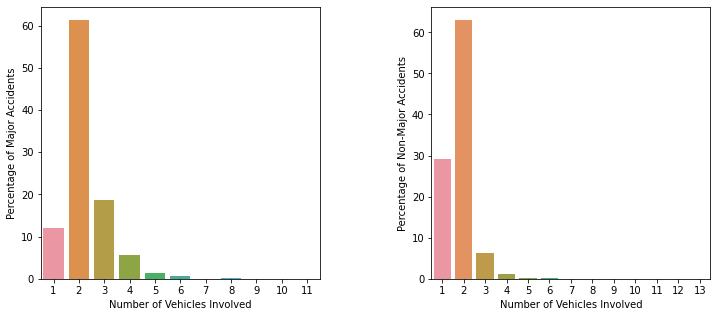

In [25]:
# plot the percentages of non-major and major accidents by number of vehicles involved
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x=major_vehicles.index, y=major_vehicles, ax=axes[0])
axes[0].set_xlabel("Number of Vehicles Involved")
axes[0].set_ylabel("Percentage of Major Accidents")

sns.barplot(x=non_major_vehicles.index, y=non_major_vehicles, ax=axes[1])
axes[1].set_xlabel("Number of Vehicles Involved")
axes[1].set_ylabel("Percentage of Non-Major Accidents")

plt.subplots_adjust(wspace = 0.4)
plt.show()

While the major of both major and non-major accidents involved just two vehicles--approximately 61.3% for major accidents and 63.0% for non-major accidents--major accidents more frequently involved three or more vehicles than did non-major accidents. In fact, approximately 26.7% of major accidents involved at least three vehicles while only about 7.86% of non-major accidents did.

## Urban or rural?

In [26]:
major_urban_rural=major_accidents.groupby('urban_or_rural_area')['urban_or_rural_area'].count()/len(major_accidents)*100
print(round(major_urban_rural,1))

urban_or_rural_area
Rural    48.2
Urban    51.8
Name: urban_or_rural_area, dtype: float64


In [27]:
non_major_urban_rural=non_major.groupby('urban_or_rural_area')['urban_or_rural_area'].count()/len(non_major)*100
print(round(non_major_urban_rural,1))

urban_or_rural_area
Rural          31.4
Unallocated     0.0
Urban          68.6
Name: urban_or_rural_area, dtype: float64


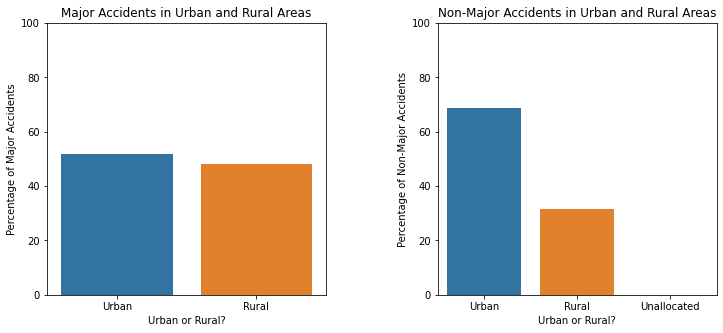

In [28]:
# plot the percentages of non-major and major accidents by whether they're in urban or rural areas
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(x=major_urban_rural.index, y=major_urban_rural, ax=axes[0], order=['Urban','Rural'])
axes[0].set_xlabel("Urban or Rural?")
axes[0].set_ylabel("Percentage of Major Accidents")
axes[0].set_title("Major Accidents in Urban and Rural Areas")
axes[0].set(ylim=(0,100))

sns.barplot(x=non_major_urban_rural.index, y=non_major_urban_rural, ax=axes[1], order=['Urban','Rural','Unallocated'])
axes[1].set_xlabel("Urban or Rural?")
axes[1].set_ylabel("Percentage of Non-Major Accidents")
axes[1].set_title("Non-Major Accidents in Urban and Rural Areas")
axes[1].set(ylim=(0,100))

plt.subplots_adjust(wspace = 0.4)
plt.show()

While non-major accidents are overwhelmingly in urban areas--approximately 68.6% were in urban areas--major accidents were more evenly split with about 51.8% having occured in urban areas and about 48.2% in rural areas.

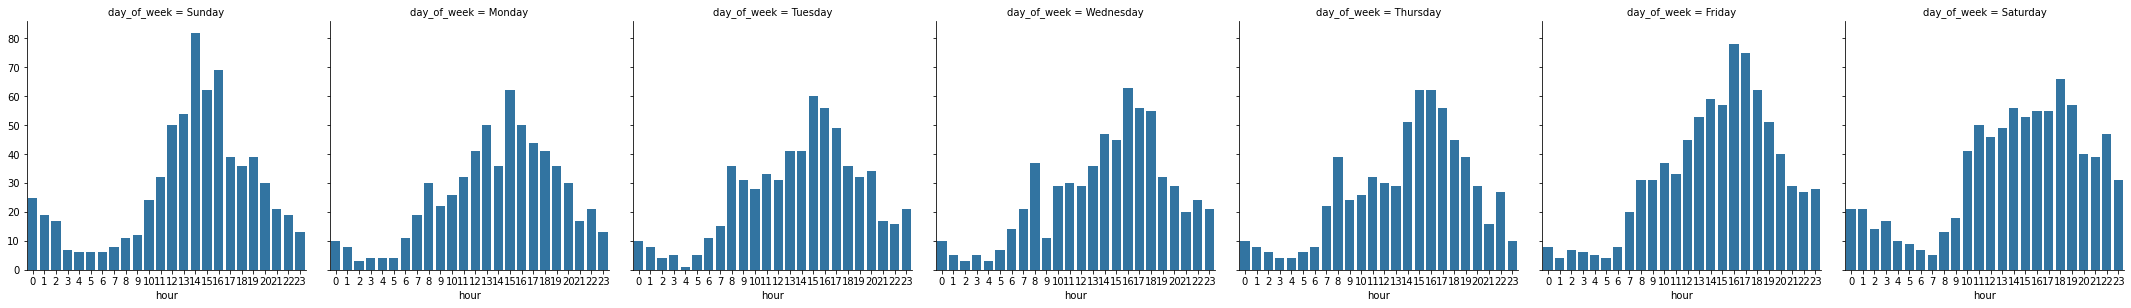

In [42]:
g = sns.FacetGrid(major_accidents, col='day_of_week', col_order=days_of_week)
g.map(sns.countplot, 'hour')
plt.gcf().set_size_inches(30,5)
plt.show()